In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [10]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [11]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("Numeric features: ",numeric_features)
print("Categorical features: ",categorical_features)

Numeric features:  ['math_score', 'reading_score', 'writing_score']
Categorical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print("Number of students with full marks in reading: ",reading_full)
print("Number of students with full marks in writing: ",writing_full)
print("Number of students with full marks in math: ",math_full)

Number of students with full marks in reading:  17
Number of students with full marks in writing:  14
Number of students with full marks in math:  7


In [14]:
reading_less_20=df[df['reading_score']<=20]['average'].count()
writing_less_20=df[df['writing_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()

print("Number of students with less than or equal to 20 marks in reading: ",reading_less_20)
print("Number of students with less than or equal to 20 marks in writing: ",writing_less_20)
print("Number of students with less than or equal to 20 marks in math: ",math_less_20)

Number of students with less than or equal to 20 marks in reading:  1
Number of students with less than or equal to 20 marks in writing:  3
Number of students with less than or equal to 20 marks in math:  4


<Axes: xlabel='total_score', ylabel='Count'>

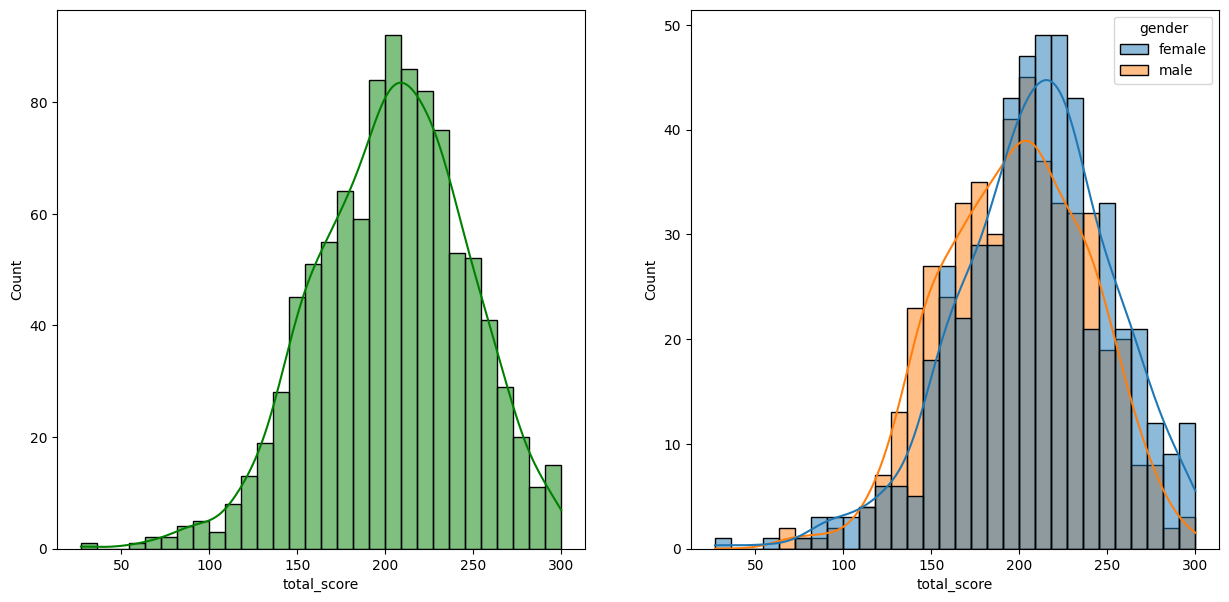

In [15]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender',color='r')

<Axes: xlabel='average', ylabel='Count'>

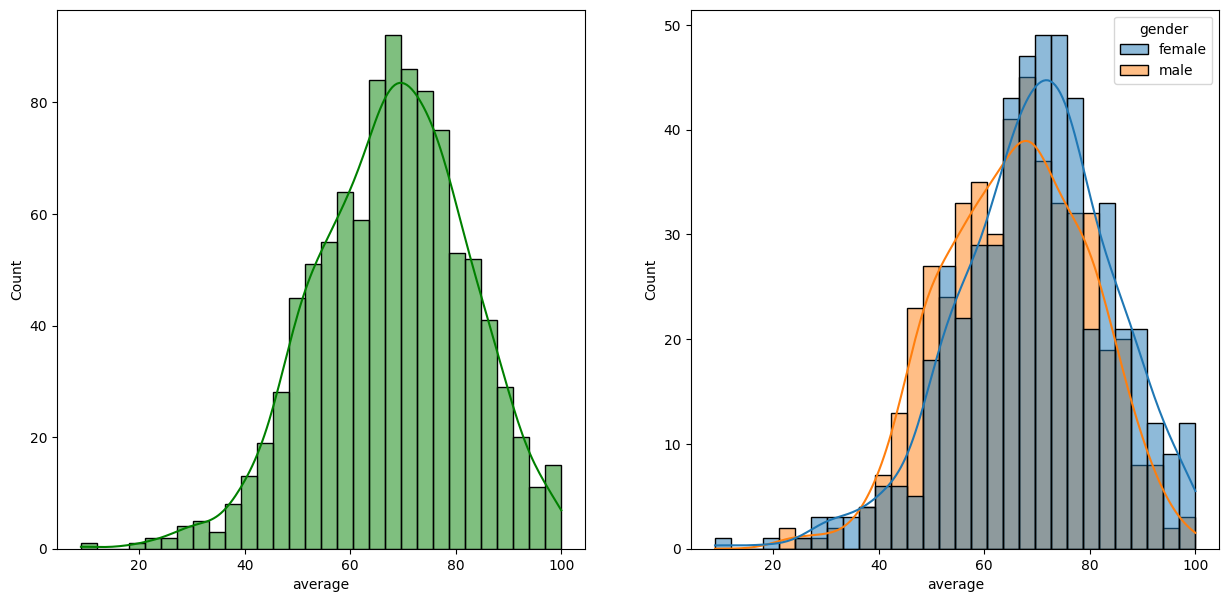

In [16]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender',color='r')

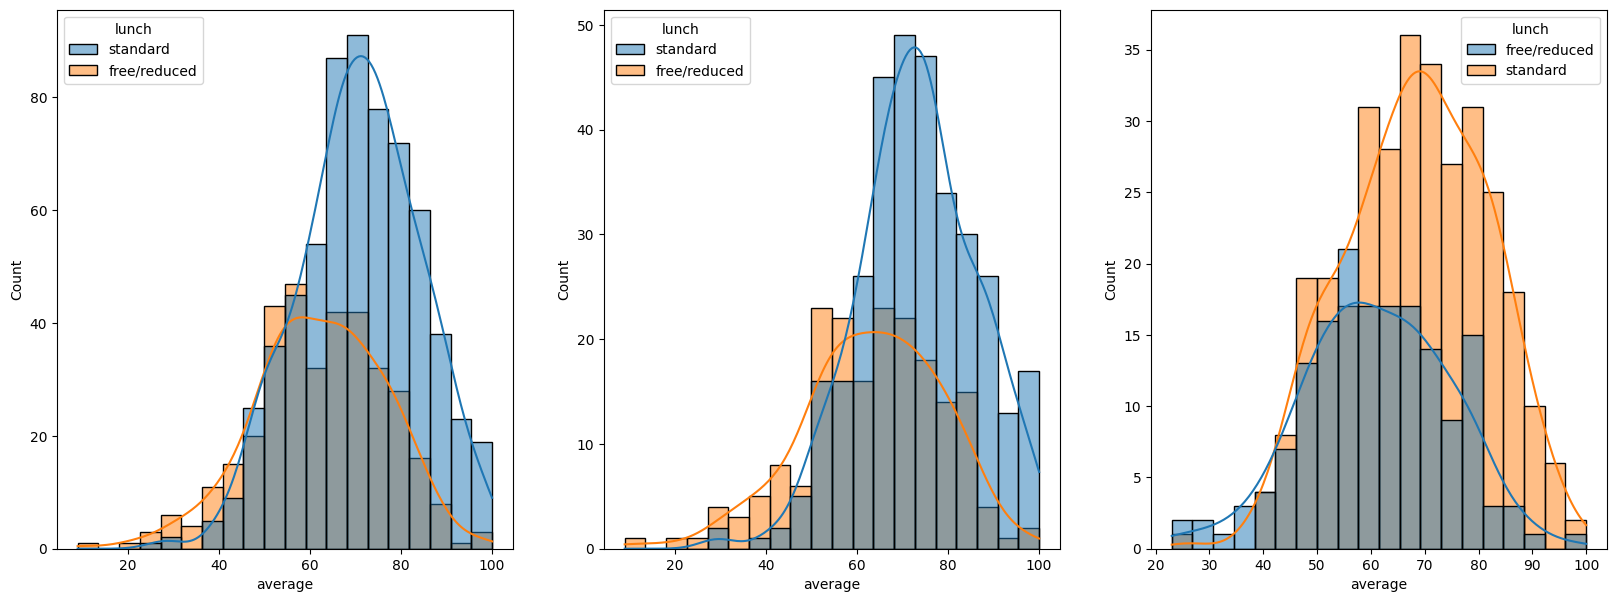

In [17]:
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=20,kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',bins=20,kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',bins=20,kde=True,hue='lunch')
plt.show()

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


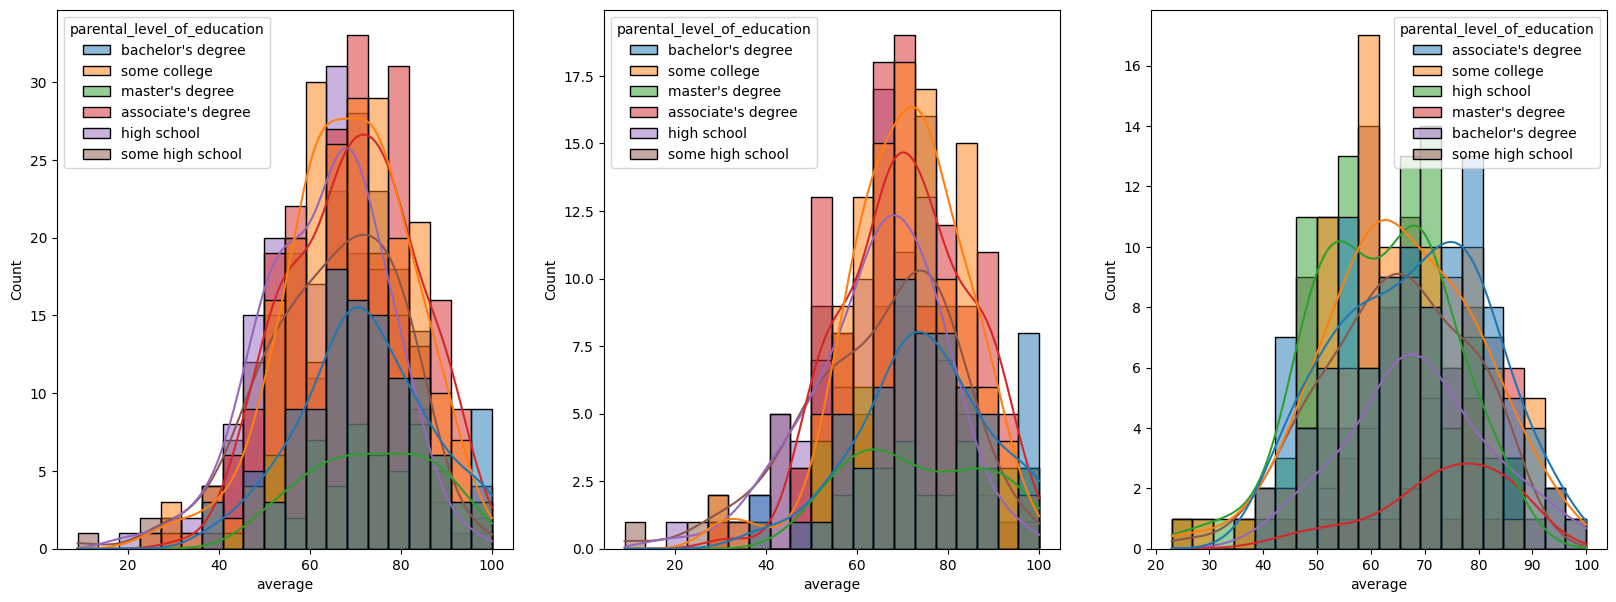

In [19]:
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=20,kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',bins=20,kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',bins=20,kde=True,hue='parental_level_of_education')
plt.show()

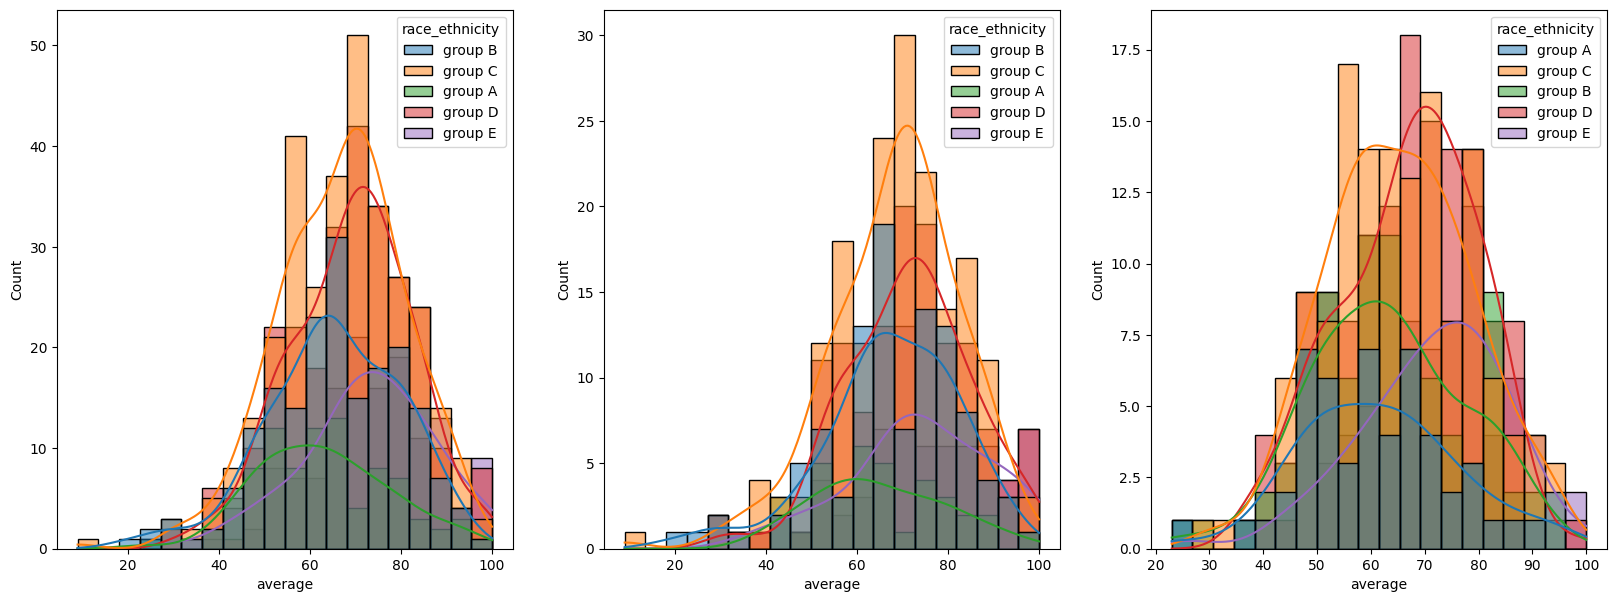

In [20]:
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=20,kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',bins=20,kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',bins=20,kde=True,hue='race_ethnicity')
plt.show()

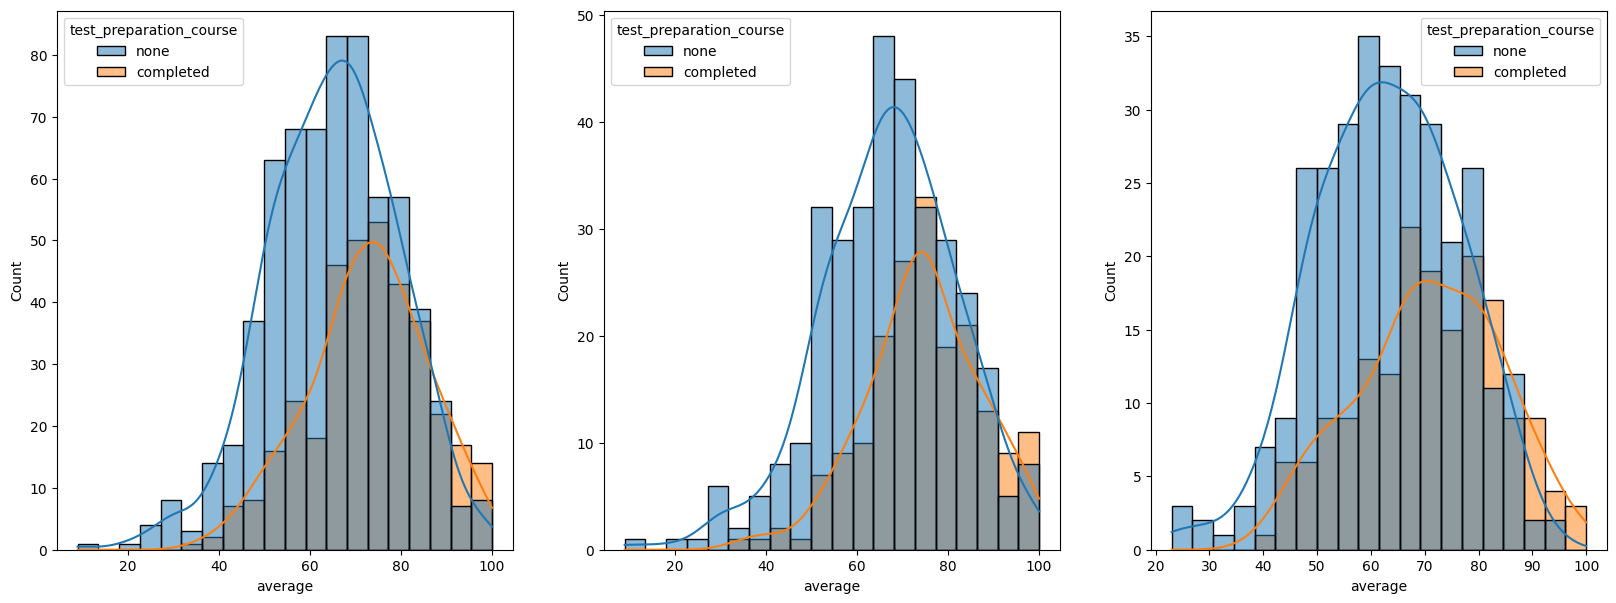

In [21]:
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=20,kde=True,hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',bins=20,kde=True,hue='test_preparation_course')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',bins=20,kde=True,hue='test_preparation_course')
plt.show()

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


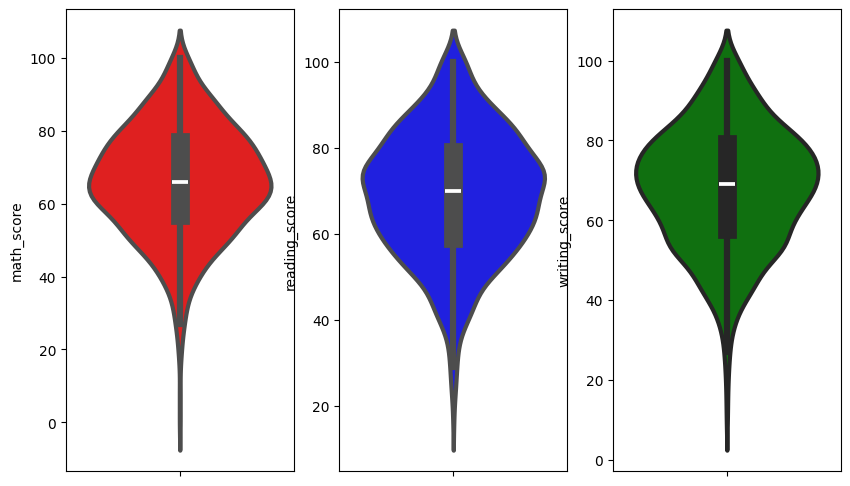

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(131)
sns.violinplot(df,y='math_score',color='red',linewidth=3)
plt.subplot(132)
sns.violinplot(df,y='reading_score',color='blue',linewidth=3)
plt.subplot(133)
sns.violinplot(df,y='writing_score',color='green',linewidth=3)
plt.show()

In [24]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

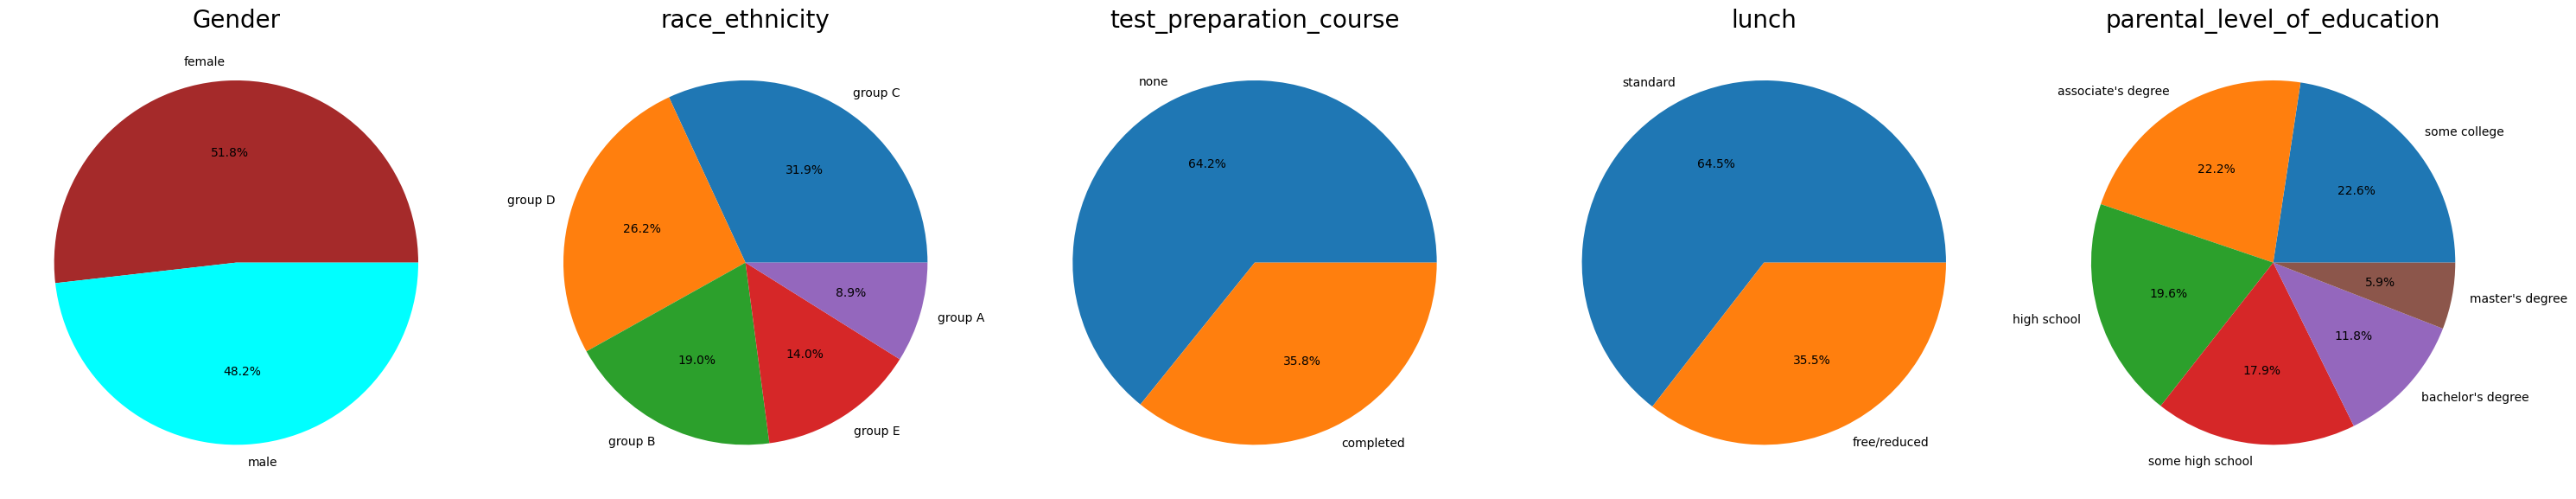

In [25]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(151)
size=df['gender'].value_counts()
labels='Female','Male'
color=['brown','cyan']
# labels=df['gender'].unique() this canot take becoz it will take labels but the oreder will not match to the oreder of size(value counts)
plt.pie(size,labels=size.index,autopct='%1.1f%%',colors=color)
plt.title("Gender",fontsize=20)

plt.subplot(152)
size=df['race_ethnicity'].value_counts()
plt.pie(size,labels=size.index,autopct='%1.1f%%')
plt.title("race_ethnicity",fontsize=20)

plt.subplot(153)
size=df['test_preparation_course'].value_counts()
plt.pie(size,labels=size.index,autopct='%1.1f%%')
plt.title("test_preparation_course",fontsize=20)

plt.subplot(154)
size=df['lunch'].value_counts()
plt.pie(size,labels=size.index,autopct='%1.1f%%')
plt.title("lunch",fontsize=20) 

plt.subplot(155)
size=df['parental_level_of_education'].value_counts()
plt.pie(size,labels=size.index,autopct='%1.1f%%')
plt.title("parental_level_of_education",fontsize=20)

plt.tight_layout()
plt.show()

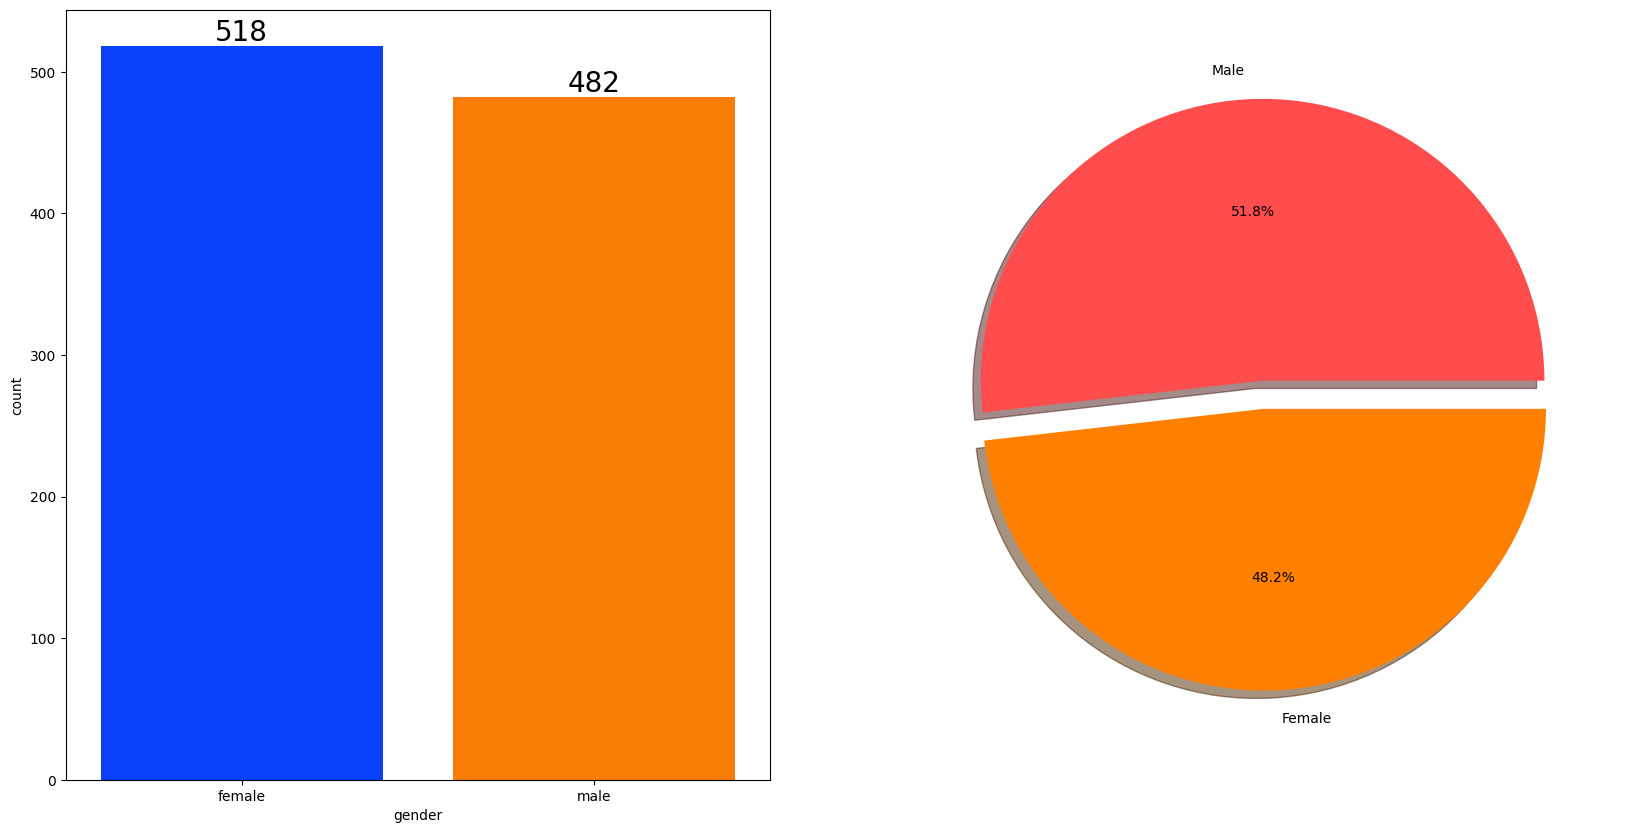

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df['gender'],ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,size=20,color='black')

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0.05,0.05],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [53]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [64]:
gender_group = df.groupby('gender').count()
gender_group

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
gender,,,,,,,,,
female,518,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482,482


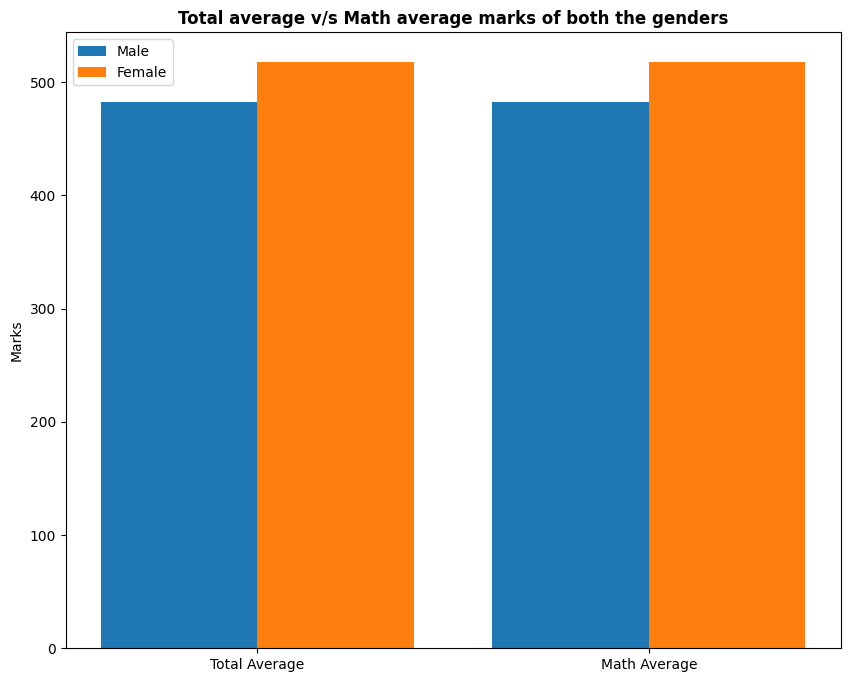

In [66]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

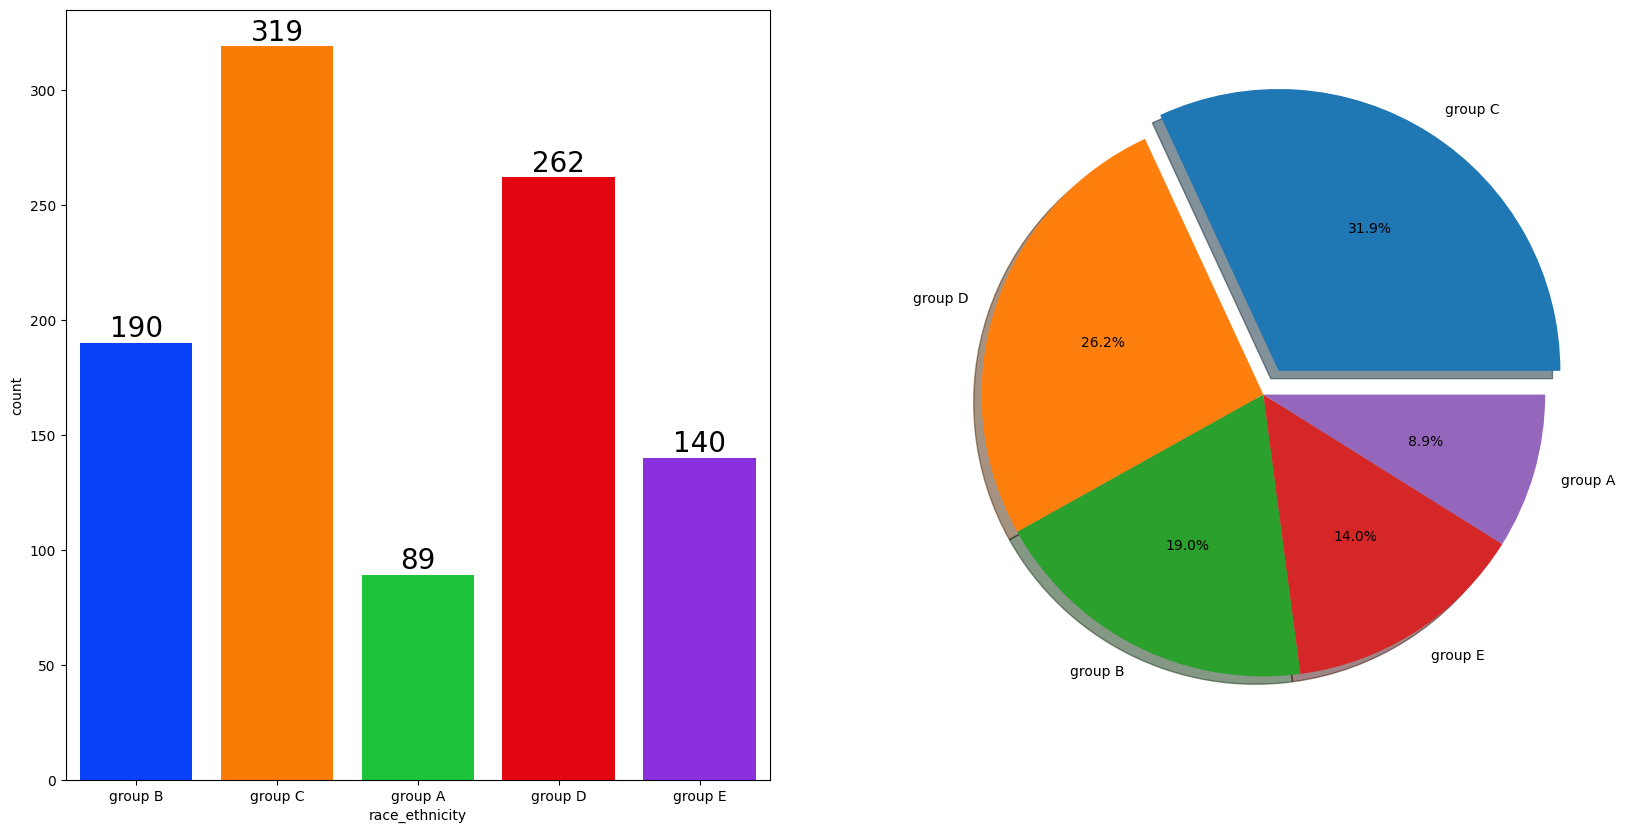

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

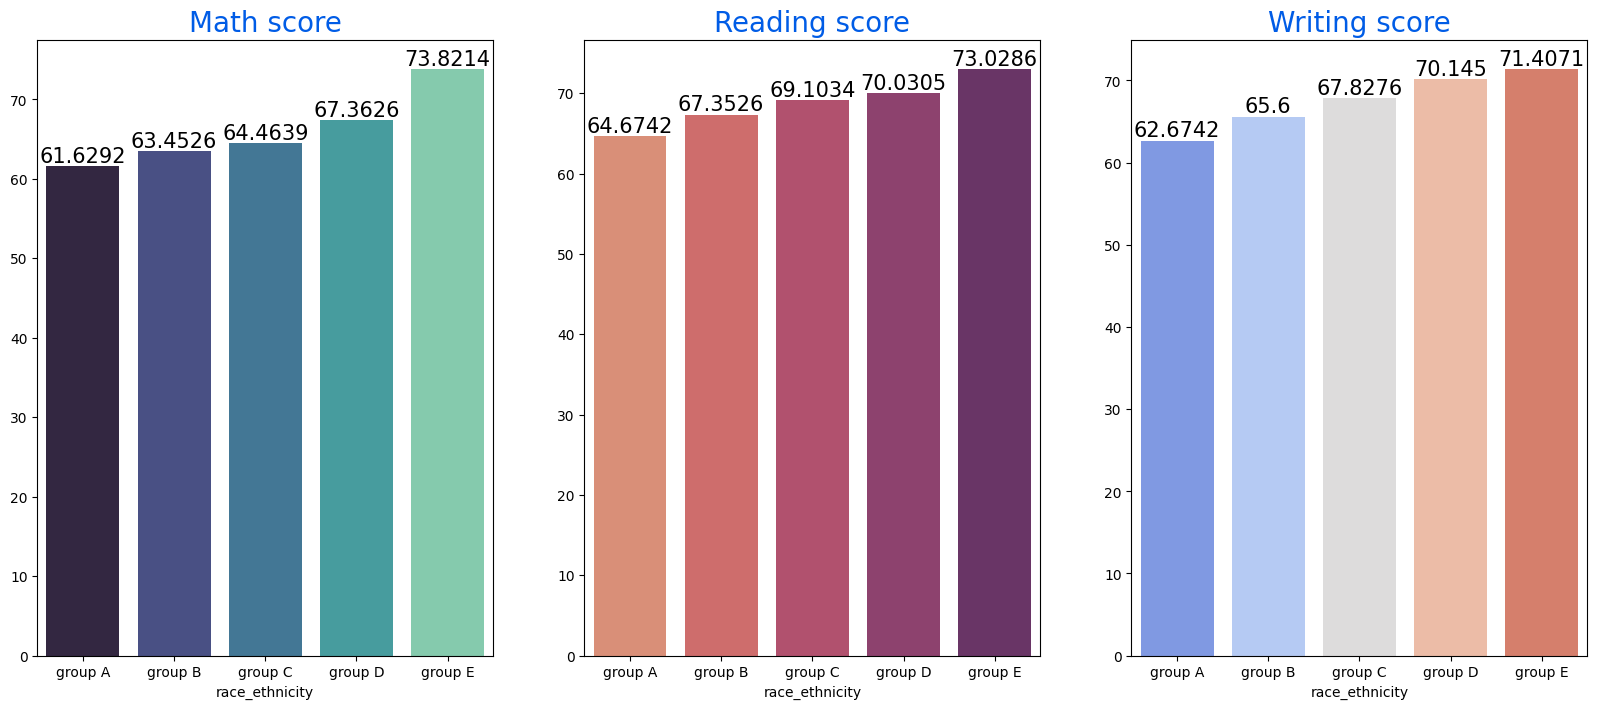

In [70]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

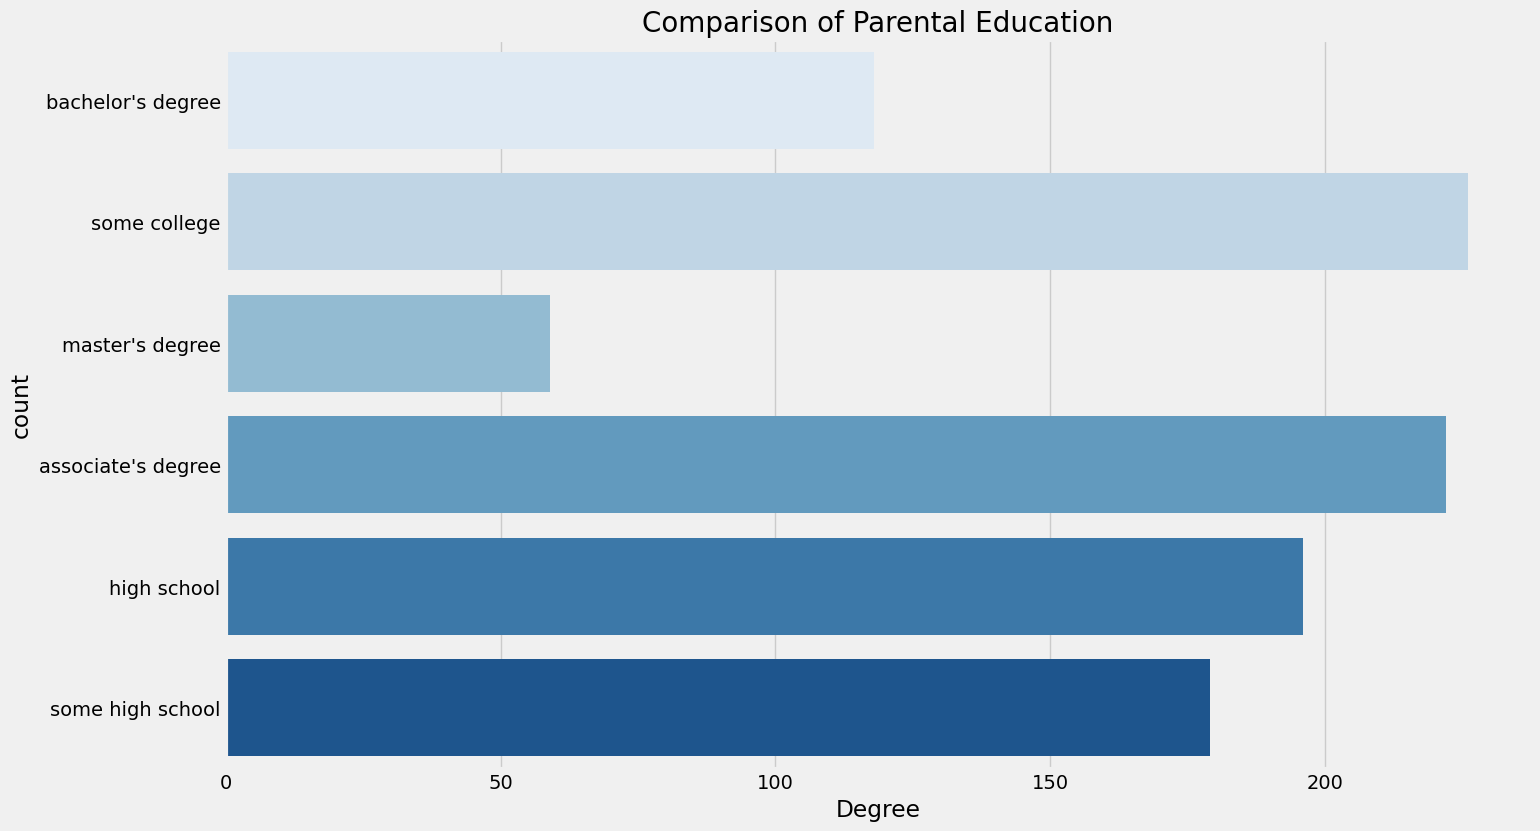

In [72]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

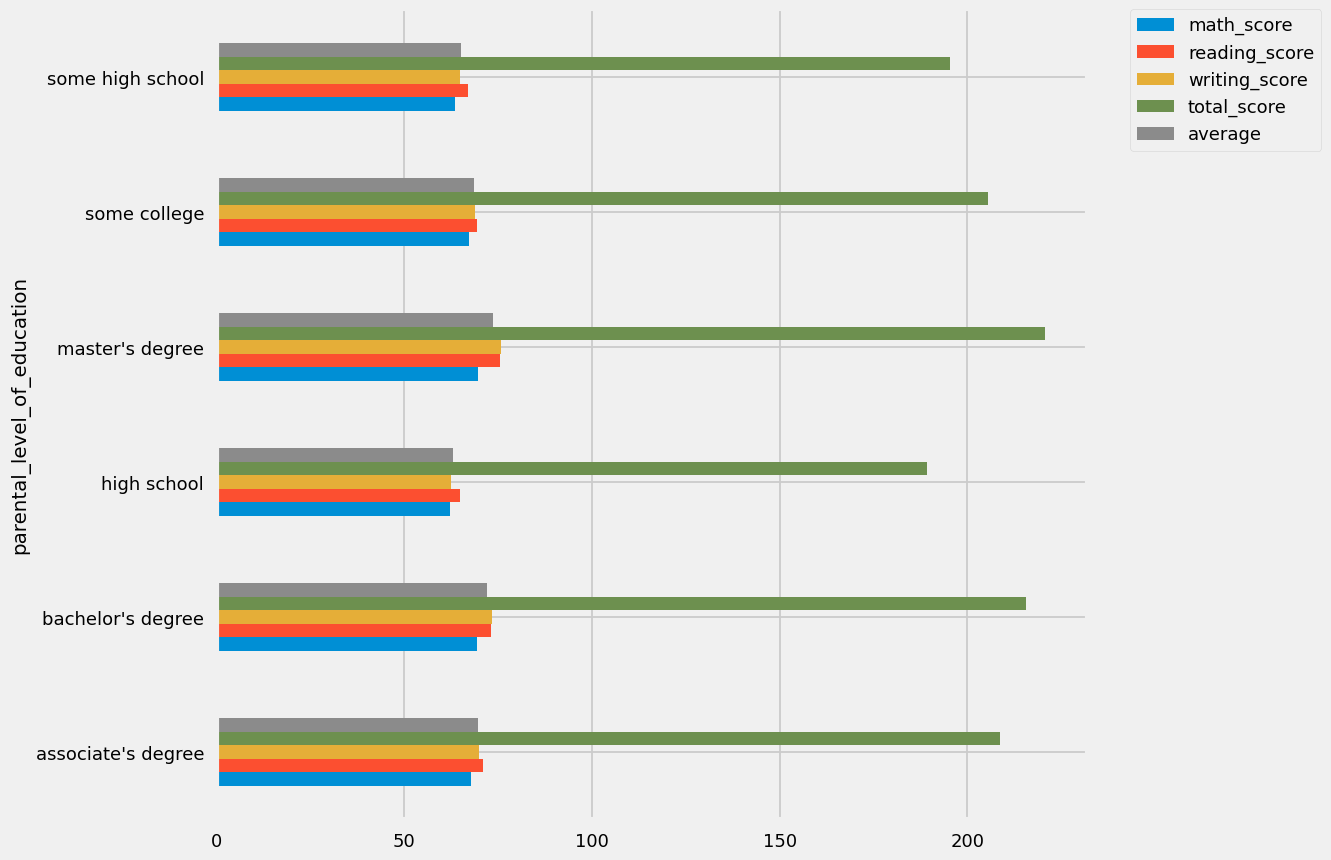

In [76]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

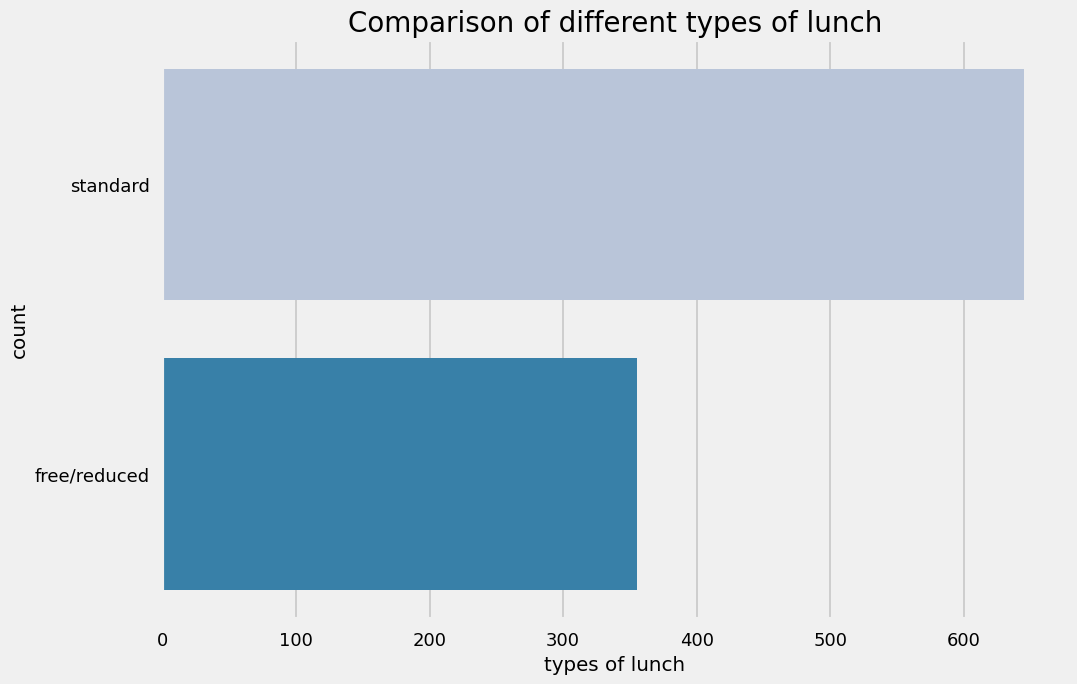

In [77]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

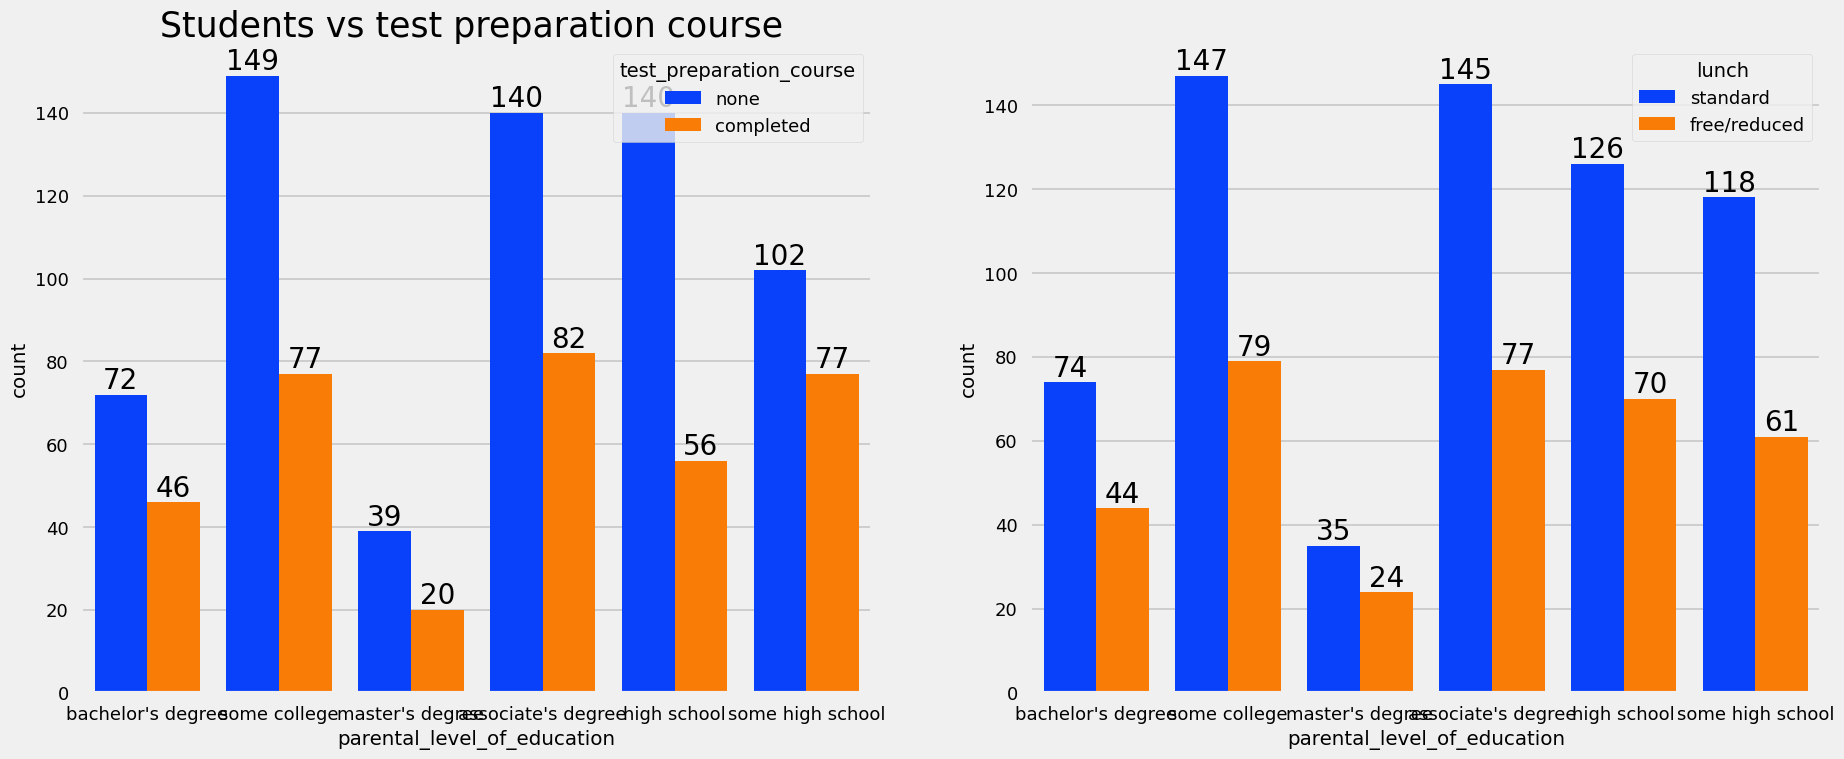

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing_score'>

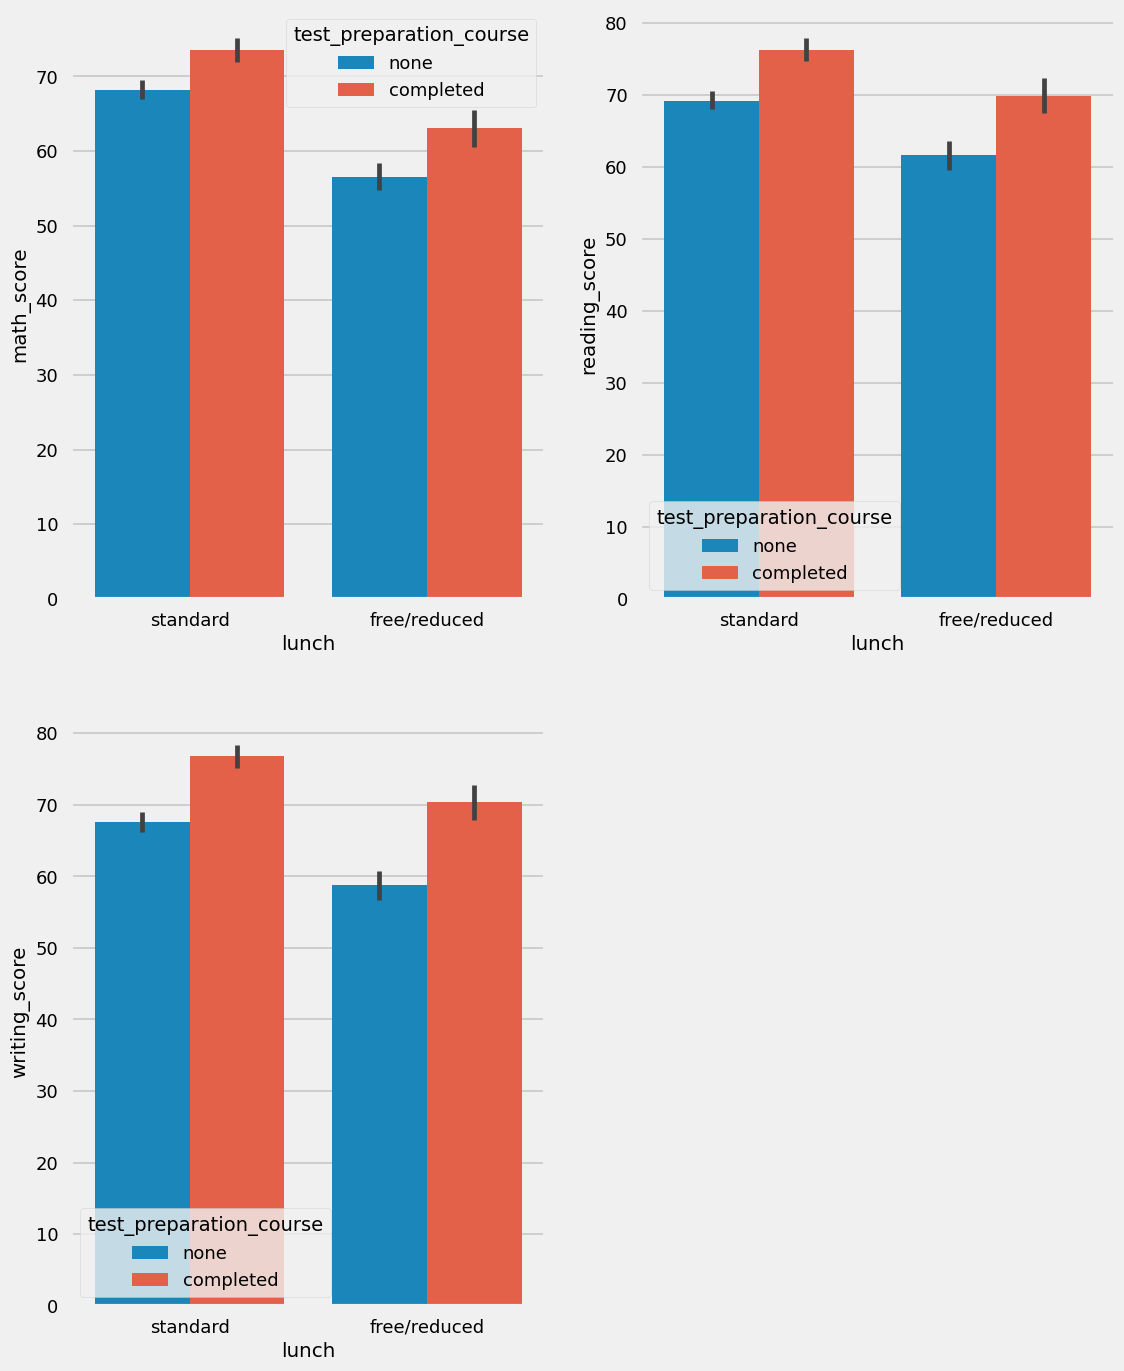

In [84]:
plt.figure(figsize=(12,16))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

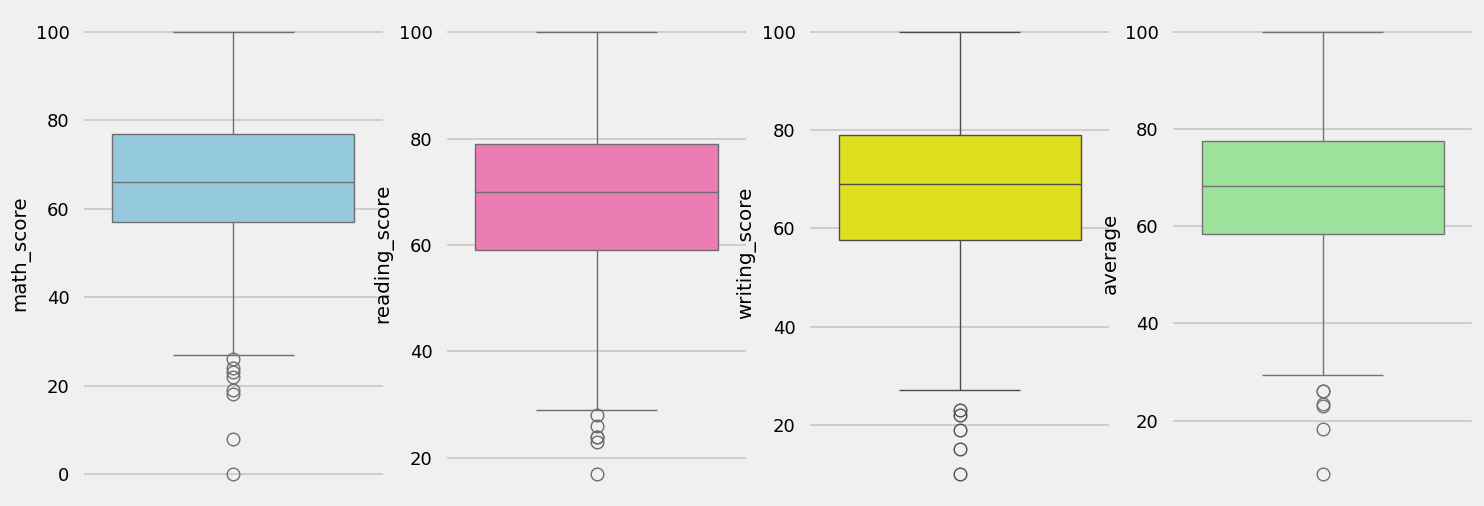

In [88]:
# outliers

plt.figure(figsize=(16,6))
plt.subplot(1,4,1)
sns.boxplot(df,y='math_score',color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df,y='reading_score',color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(df,y='writing_score',color='yellow')
plt.subplot(1,4,4)
sns.boxplot(df,y='average',color='lightgreen')
plt.show()

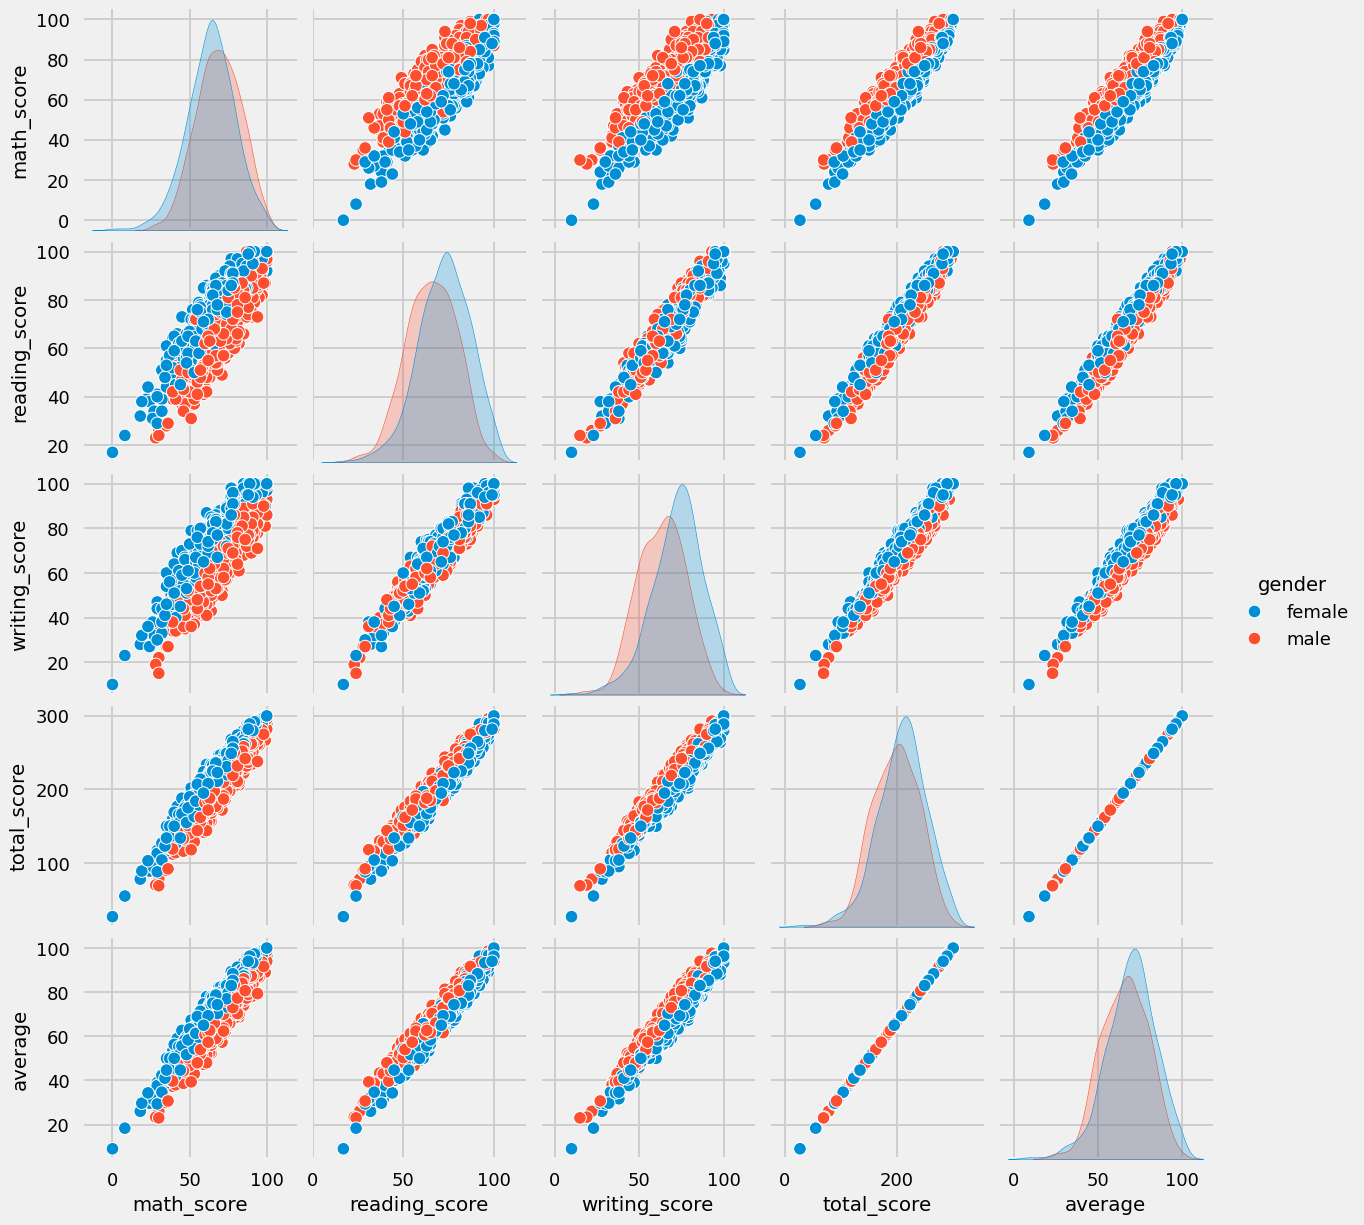

In [89]:
sns.pairplot(df,hue='gender')
plt.show()